<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Time Series: Rolling Statistics


# Independent Practice

**Instructor Note:** These are optional and can be assigned as student practice questions outside of class.

### Load the Unemployment data set. Perform any necessary cleaning and preprocess the data by creating a `datetime` index.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['font.size'] = 14
plt.style.use('fivethirtyeight')

In [2]:
unemp = pd.read_csv('../data/unemployment.csv')
unemp.head()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
0,1948Q1,3.733%
1,1948Q2,3.667%
2,1948Q3,3.767%
3,1948Q4,3.833%
4,1949Q1,4.667%


In [3]:
unemp.tail()

,Quarter,Seasonally adjusted quarterly U.S. unemployment rates from 1948 to 1993
170,1990Q3,5.6%
171,1990Q4,5.9%
172,1991Q1,6.5%
173,1991Q2,6.833%
174,Seasonally adjusted quarterly U.S. unemploymen...,NaN


In [4]:
# Rename columns in the dataset.
unemp.columns = ['year_quarter', 'unemployment_rate']

# Drop % and convert string to float
unemp['unemployment_rate'] = unemp['unemployment_rate'].map(lambda x: float(str(x).replace('%','')))

unemp.head()

In [5]:
# Drop NaN values.
unemp.dropna(inplace=True)

unemp.tail()

,year_quarter,unemployment_rate
0,1948Q1,3.733
1,1948Q2,3.667
2,1948Q3,3.767
3,1948Q4,3.833
4,1949Q1,4.667


In [6]:
unemp.dtypes

year_quarter          object
unemployment_rate    float64
dtype: object

In [7]:
# This is quarterly data, so converting to datetime is a bit complicated. 
# Use .dt.to_period('Q') to help represent the string as a datetime object.
unemp['date'] = pd.to_datetime(unemp.year_quarter).dt.to_period('Q')
unemp.set_index('date', inplace=True)
unemp.head()

,year_quarter,unemployment_rate
date,,
1948Q1,1948Q1,3.733
1948Q2,1948Q2,3.667
1948Q3,1948Q3,3.767
1948Q4,1948Q4,3.833
1949Q1,1949Q1,4.667


### Plot the unemployment rate.

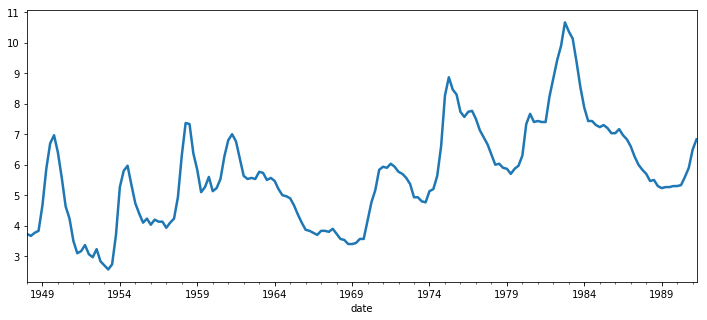

In [8]:
unemp['unemployment_rate'].plot(lw=2.5, figsize=(12,5));

### Calculate the rolling mean of years with `window=3 `, without centering, and plot both the unemployment rates and the rolling mean data.

In [9]:
yearly = unemp['unemployment_rate'].resample('A').mean().rolling(window=3, center=False).mean()
yearly.head()

date
1948         NaN
1949         NaN
1950    5.002833
1951    4.847333
1952    3.838917
Freq: A-DEC, Name: unemployment_rate, dtype: float64

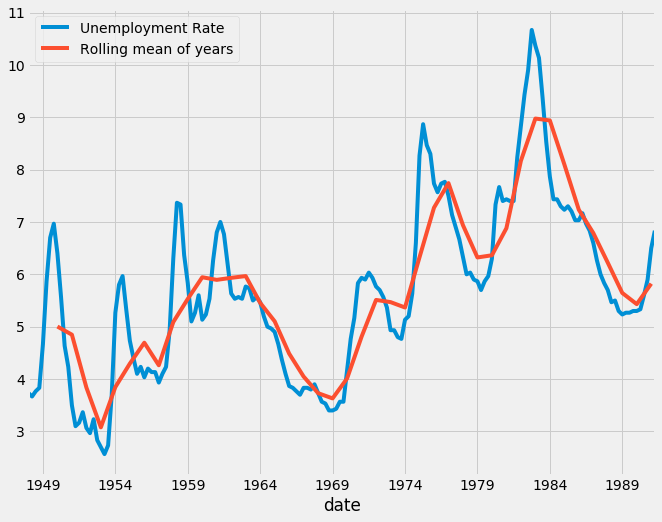

In [13]:
fig, ax = plt.subplots()
unemp.unemployment_rate.plot(legend = True);
yearly.plot(legend = True);
ax.legend(['Unemployment Rate', 'Rolling mean of years']);

### Calculate the rolling median with `window=5` and `window=15`. Plot both together with the original data.

In [14]:
roll_med_5 = unemp.unemployment_rate.rolling(window=5).median()
roll_med_15 = unemp.unemployment_rate.rolling(window=15).median()

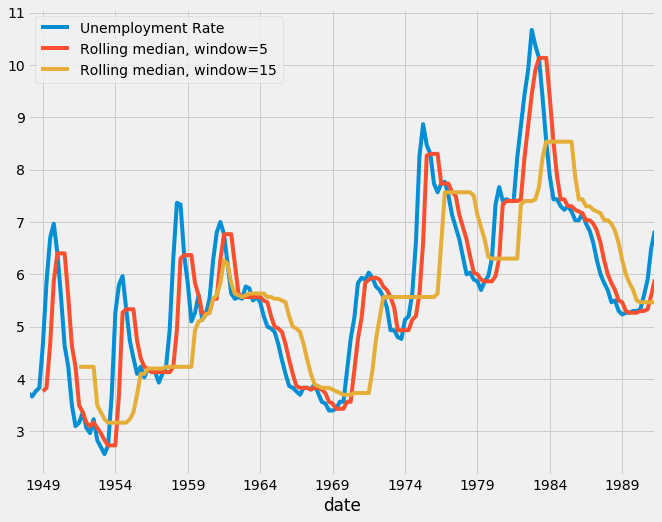

In [15]:
fig, ax = plt.subplots()
unemp.unemployment_rate.plot(legend = True);
roll_med_5.plot(legend = True);
roll_med_15.plot(legend = True);

ax.legend(['Unemployment Rate', 'Rolling median, window=5', 'Rolling median, window=15']);

### Calculate and plot the expanding mean. Resample by quarter. Plot the rolling mean and the expanding mean together.

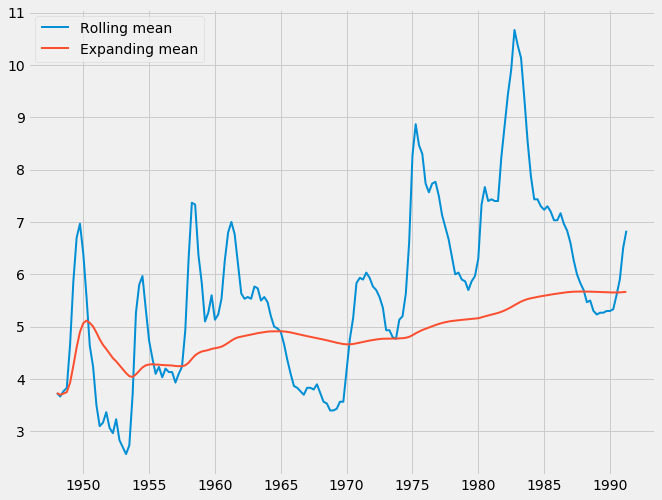

In [16]:
date_ticks = unemp.index.to_timestamp()

quarterly_data = unemp.unemployment_rate.resample('Q').sum()
rolling_mean = quarterly_data.rolling(window=1, center=False).mean()
expanding_mean = quarterly_data.expanding().mean()

plt.plot(date_ticks, rolling_mean, alpha=1, lw=2, label='Rolling mean')
plt.plot(date_ticks, expanding_mean, alpha=1, lw=2, label='Expanding mean')

plt.legend(loc='upper left')

plt.tick_params(labelsize=14)

### Calculate exponentially weighted sum and add to the previous plot.

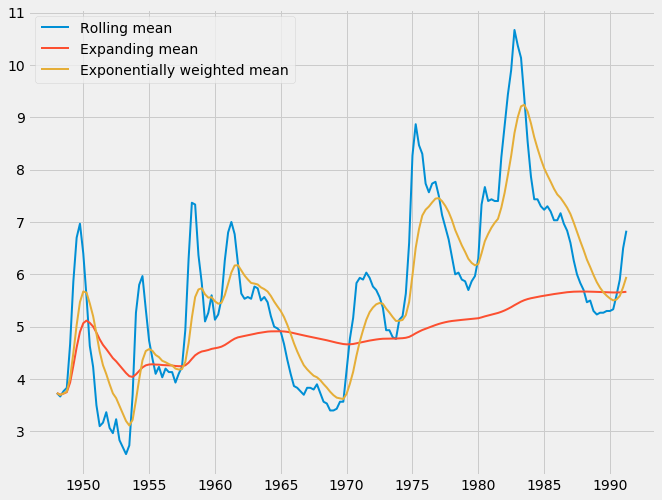

In [17]:
exp_weighted_mean = quarterly_data.ewm(span=10).mean()

plt.plot(date_ticks, rolling_mean, alpha=1, lw=2, label='Rolling mean')
plt.plot(date_ticks, expanding_mean, alpha=1, lw=2, label='Expanding mean')
plt.plot(date_ticks, exp_weighted_mean, alpha=1, lw=2, label='Exponentially weighted mean')

plt.legend(loc='upper left')

plt.tick_params(labelsize=14)

### Difference the unemployment rate and plot.

In [20]:
unemp['unemp_diff'] = unemp['unemployment_rate'].diff()

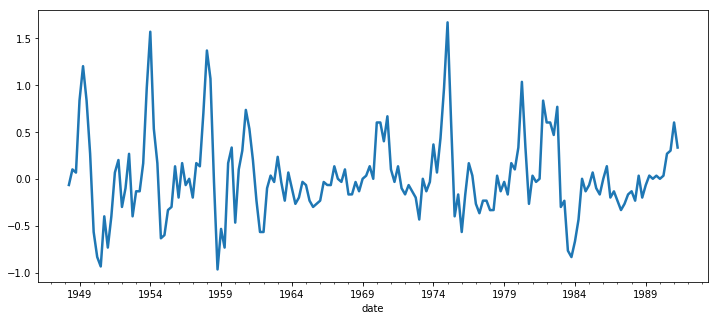

In [21]:
unemp['unemp_diff'].plot(lw=2.5, figsize=(12,5))